## **Notebook PC1_Ativ1**
## Regularized Linear Classifier for the MNIST database.
## Design from scratch.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**


In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

Xa = Xa / 255.0
Xta = Xta / 255.0

X0 = np.ones((Xp.shape[0],1))
X = np.hstack((X0,Xa))
Xt0 = np.ones((Xtp.shape[0],1))
Xt = np.hstack((Xt0,Xta))

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  X.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

Shape of X:  (60000, 785)
Shape of y:  (60000,)
Shape of Xt:  (60000, 785)
Shape of yt:  (10000,)


In [10]:
# Visualizing a random data point
import plotly.express as px

ind = np.random.randint(60000)
print('Data point: ', ind, '\n', 'Label: ', y[ind])
fig = px.imshow(255-Xp[ind], binary_string=True, width=200, height=200)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig.show()

Data point:  29373 
 Label:  7


In [11]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


In [12]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

X_training:          (42000, 785)
y_training:          (42000, 10)
X_validation:        (18000, 785)
y_validation:        (18000, 10)


In [13]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_ 

In [14]:
def get_w(X, y, c): 
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w


In [15]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []
    
    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)
        
        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [16]:
c_values = [pow(2,d) for d in range(-10, 18, 2)]

hit_rates_training, Ws = get_rates_from_c_values(X_training, y_training, c_values)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536


In [17]:
hit_rates_validation, _ = get_rates_from_c_values(X_validation, y_validation, c_values, Ws)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536


Best c value: 256 
Performance of this value: 0.8542222222222222


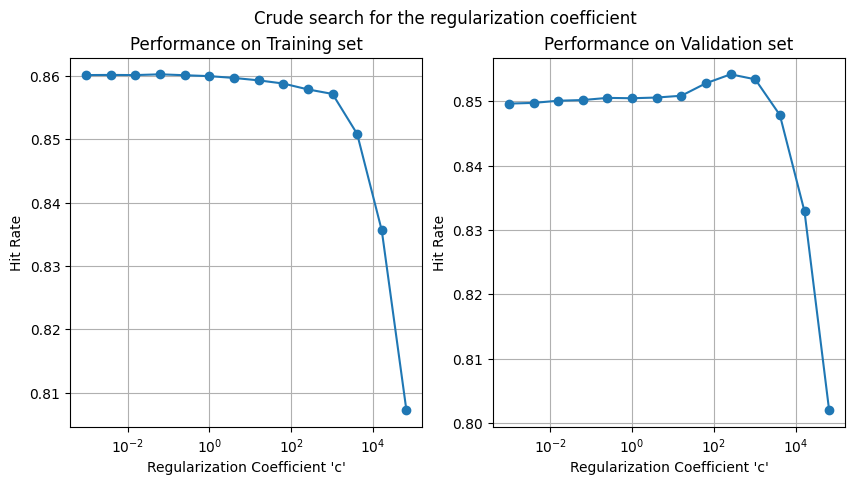

In [18]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))



In [19]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(X_training, y_training, fine_c_values)

64.0
160.0
256.0
352.0
448.0
544.0
640.0
736.0
832.0
928.0
1024.0


In [20]:
hit_rates_validation_fine, _ = get_rates_from_c_values(X_validation, y_validation, fine_c_values, Ws_fine)

64.0
160.0
256.0
352.0
448.0
544.0
640.0
736.0
832.0
928.0
1024.0


Best c value: 352.0 
Performance of this value: 0.8543333333333333


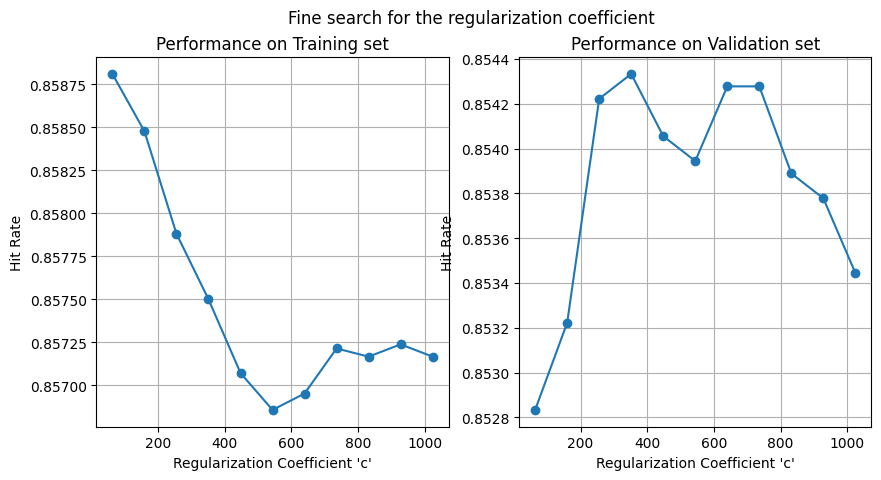

In [21]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [22]:
W = get_w(X, yy, best_c)
print(W.shape)

(785, 10)


In [23]:
yt_estimate = np.matmul(Xt,W)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.8639
[[ 944    0   18    4    0   21   17    4   14   18]
 [   0 1107   59   17   22   17   10   44   52   11]
 [   1    2  824   22    6    4    7   16   10    2]
 [   1    2   23  888    0   83    0    7   32   13]
 [   1    2   15    5  882   23   19   22   25   74]
 [   8    1    0   14    2  647   16    0   33    0]
 [  15    5   34   10   10   23  882    1   17    1]
 [   2    1   21   23    1   16    0  891   14   70]
 [   7   15   34   16   11   39    7    0  761    7]
 [   1    0    4   11   48   19    0   43   16  813]]


#### **Visualization of the 10 vectors of weights W, without the bias.**



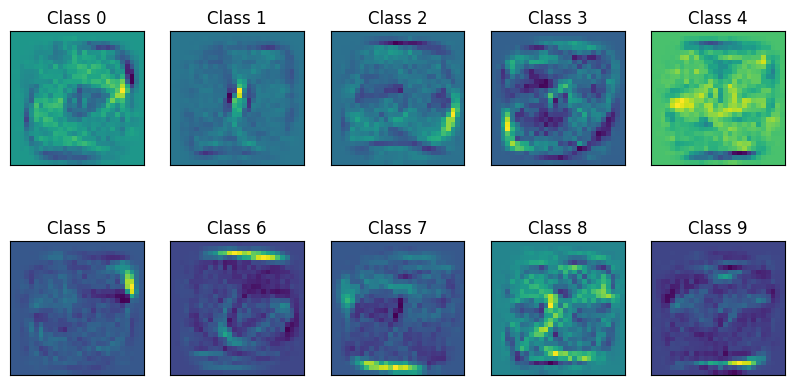

In [24]:
# Only for the MNIST dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

#### **To improve the visualization of the 10 vectors of weights W, the use of a divergent color map is indicated: the average value of the color map is a neutral color and the extreme values represent different colors. Using a divergent color map and a bilinear interpolation scheme (to facilitate the visualization of low-resolution images), the result of the visualization of the 10 vectors of weights W is illustrated in the following images.**

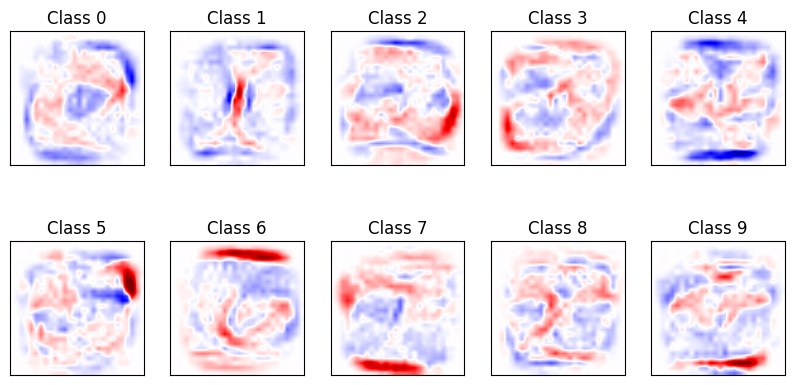

In [25]:
# Only for the MNIST dataset
scale = np.abs(W).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

#### **Performance of the average 10 vectors of weights (here no bias is considered)**

In [26]:
W1 = np.zeros((784, 10))
for i in range(10):
  aux = np.mean(Xp[y==i], axis=0)
  aux = aux.reshape(784)/255
  aux = aux-np.mean(aux)
  W1[:,i] = aux/np.sqrt(np.sum(np.square(aux)))
yt_estimate = np.matmul(Xta,W1)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.8208
[[ 902    0   27    6    4   27   29    8    7   16]
 [   0 1074   51    5   10   37   14   51   21   17]
 [   6    9  776   25    3    9   16   26   11    6]
 [   3    4   43  851    0  137    1    0   91   12]
 [   0    0   27    1  793   20   18   16   12   80]
 [  33    4    0   28    1  564   22    0   29   11]
 [  25    4   31    8   24   29  850    1   17    3]
 [   1    0   15   14    1   11    0  849   10   29]
 [  10   40   56   52   19   34    8   22  738   24]
 [   0    0    6   20  127   24    0   55   38  811]]


#### **Visualization of the average 10 vectors of weights**

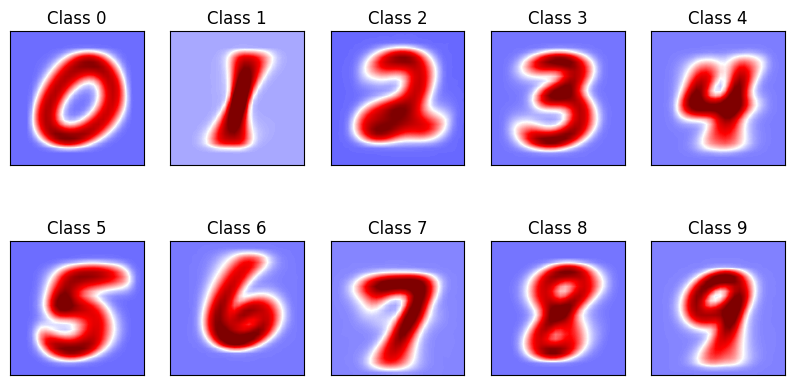

In [27]:
# Only for the MNIST dataset
scale = np.abs(W1).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W1[:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

Image no. 11


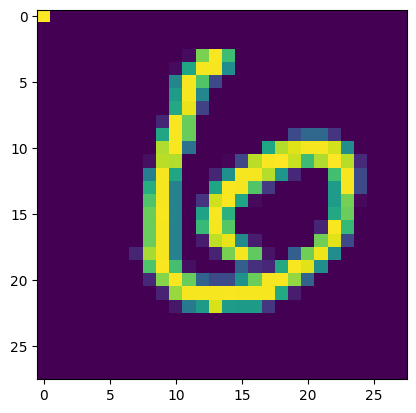

Real: 6
Predicted: 4
Rank of the correct answer: 6
Probabilities: [ 0.23839602  0.16313191  0.16605904  0.07258426  0.28249093 -0.1895778
  0.07421225 -0.06423531  0.17661191  0.05874288] 

Image no. 33


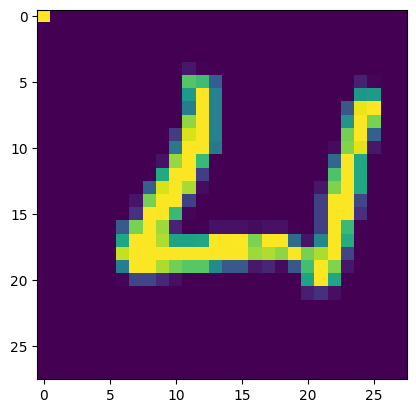

Real: 4
Predicted: 5
Rank of the correct answer: 4
Probabilities: [ 0.36014817 -0.0772397   0.18439732 -0.31110384  0.20913696  0.3652714
  0.22212065 -0.03020066  0.07144881 -0.03199011] 

Image no. 38


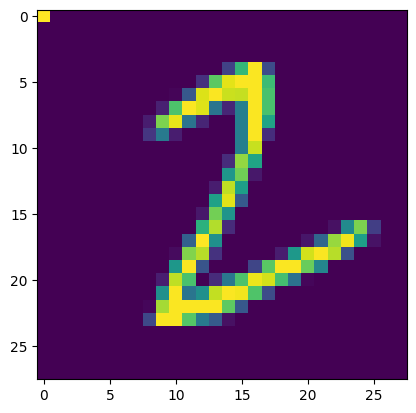

Real: 2
Predicted: 1
Rank of the correct answer: 5
Probabilities: [ 0.18438529  0.34111144  0.16266248  0.25812239 -0.27578697  0.089422
  0.20267539 -0.03935225  0.11986833 -0.08007383] 

Image no. 43


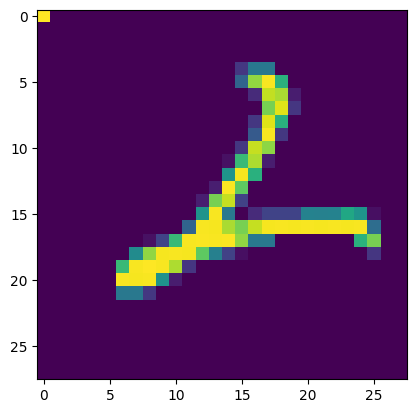

Real: 2
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.0300577   0.35270249  0.27115024  0.05719846  0.21161813  0.0561283
 -0.0222994  -0.0261754   0.12078946 -0.03498691] 

Image no. 45


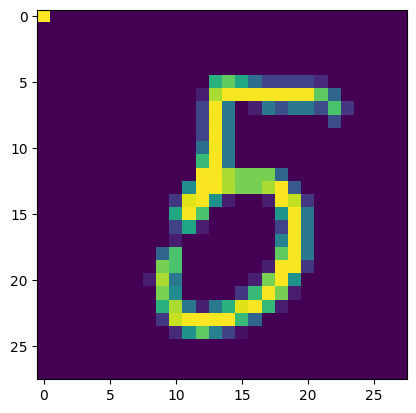

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.08963127 -0.11791574 -0.05564149  0.37941474  0.05458421  0.34696621
  0.17926936 -0.08267856  0.17745141 -0.00240282] 

Image no. 46


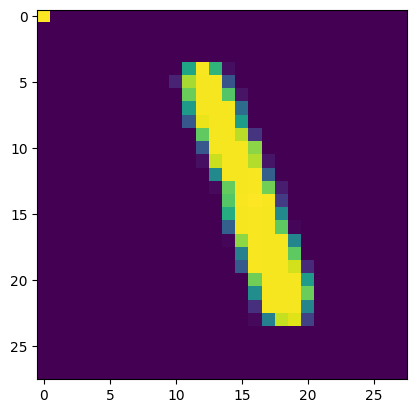

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [-0.28159616  0.31948594  0.14719901  0.3449457   0.09083771  0.19733256
  0.06357848  0.05117541 -0.00306602  0.06213398] 

Image no. 47


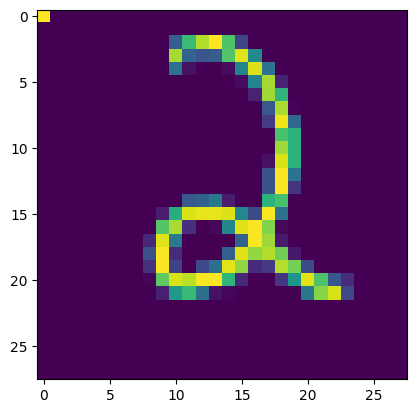

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.00508461  0.00170105  0.34410434  0.03555215 -0.03160258  0.10814423
  0.46607832  0.06740333 -0.07782355  0.05268823] 

Image no. 54


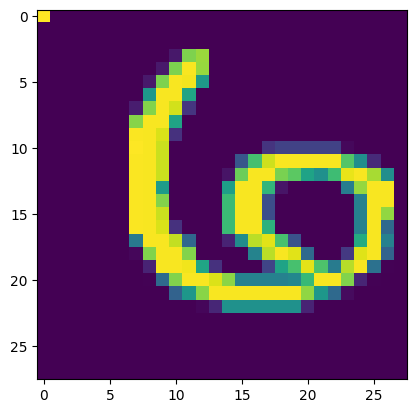

Real: 6
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.09820152  0.15208362  0.45036094 -0.05118269  0.18932893 -0.20983756
  0.44292492 -0.08159347  0.0728085  -0.05652785] 

Image no. 63


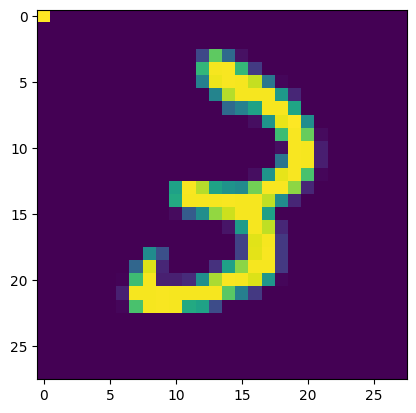

Real: 3
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.06289095  0.04815336  0.4115354   0.18399654  0.06253232 -0.02659227
 -0.04900538 -0.11191915  0.1191596   0.28117714] 

Image no. 66


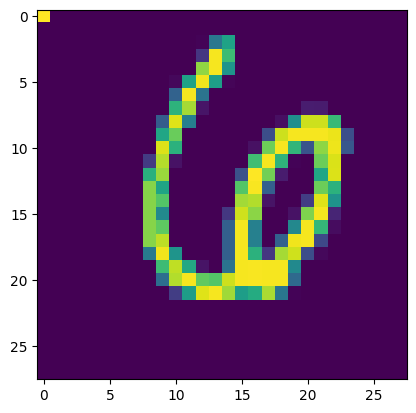

Real: 6
Predicted: 1
Rank of the correct answer: 4
Probabilities: [ 0.22973806  0.27747595  0.11614112  0.12916665  0.21828639 -0.09157997
  0.20659401  0.13217673 -0.08308995 -0.14774974] 

Image no. 80


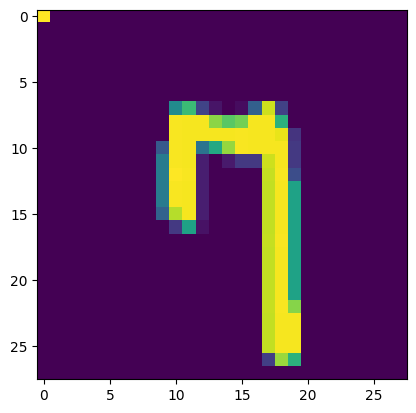

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.10422241 -0.13371617 -0.00263293  0.06502465  0.07454951  0.09433116
  0.00662298  0.44210178 -0.20214686  0.54809219] 

Image no. 92


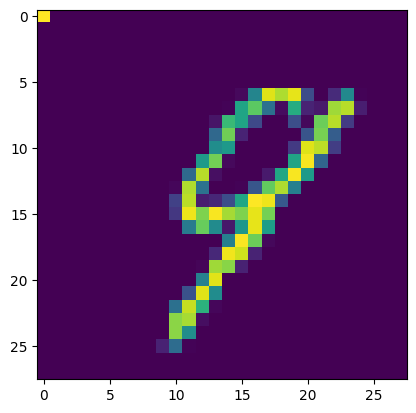

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.02841461  0.11558417  0.08822064 -0.02970421  0.26997027  0.06231662
  0.03995813  0.11826931  0.07248917  0.19250596] 

Image no. 97


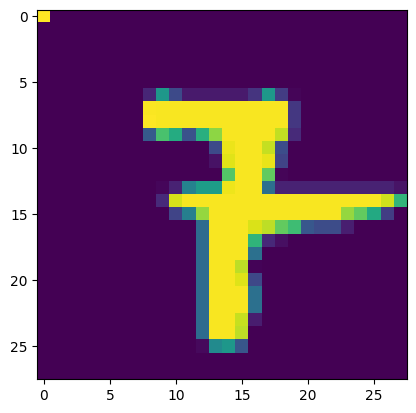

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.12813046  0.40481101 -0.14203086  0.20832317  0.14480703  0.00849479
  0.21122324  0.37122988 -0.01893284 -0.02546348] 

Image no. 111


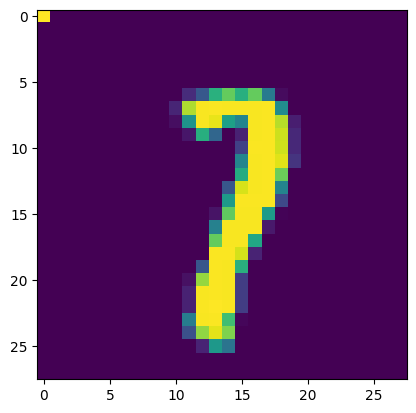

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.06190848  0.51462235  0.09024412  0.159625   -0.08762044 -0.00658303
 -0.03577596  0.22142817  0.02583327  0.1799327 ] 

Image no. 124


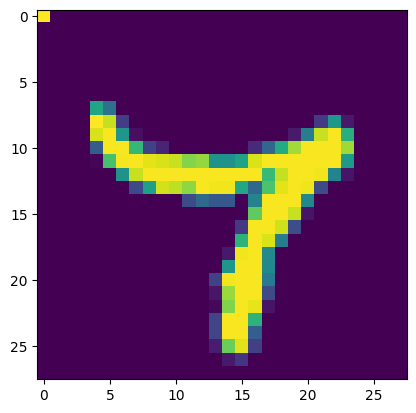

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.22289824  0.01603292 -0.24012638  0.1692468   0.39748451 -0.07638595
  0.06522628  0.34035181  0.28603627  0.25816349] 

Image no. 149


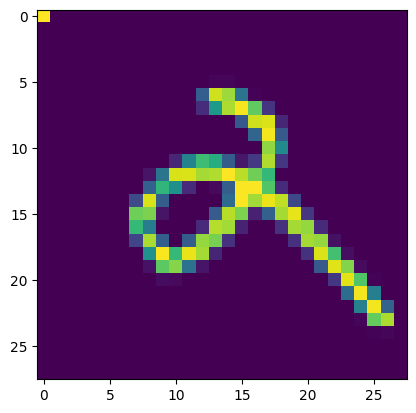

Real: 2
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.01134028  0.28969757  0.10997923  0.037483    0.22039589  0.0624512
  0.04179517 -0.14693135  0.09097133  0.26477678] 

Image no. 151


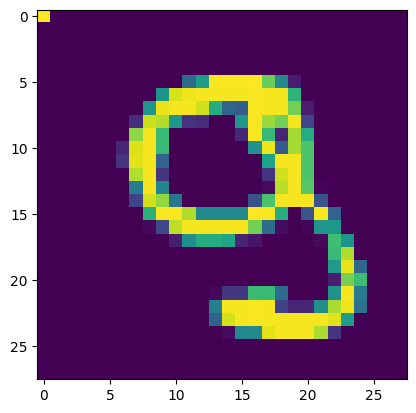

Real: 9
Predicted: 8
Rank of the correct answer: 3
Probabilities: [ 0.17299654  0.04304443  0.12157343  0.04363451  0.2629328  -0.07514274
 -0.19635699  0.0927186   0.30022589  0.24458483] 

Image no. 167


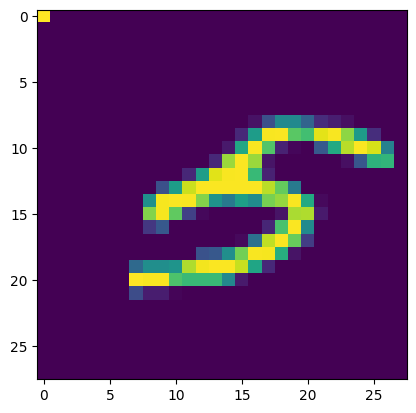

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.03089834  0.21142316  0.03144352  0.30635743  0.22779845  0.29371875
 -0.01489982 -0.02035478 -0.01819719 -0.07730556] 

Image no. 185


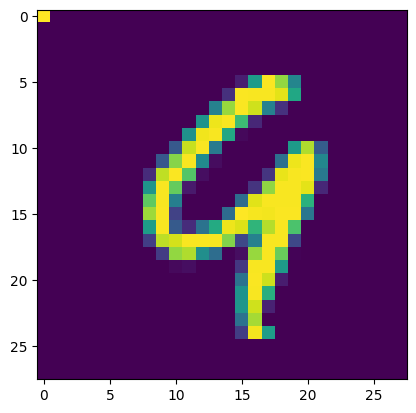

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.04006006  0.0386689   0.05382405 -0.08699931  0.39347993 -0.13588886
  0.10925578  0.04518253  0.23675861  0.37010383] 

Image no. 187


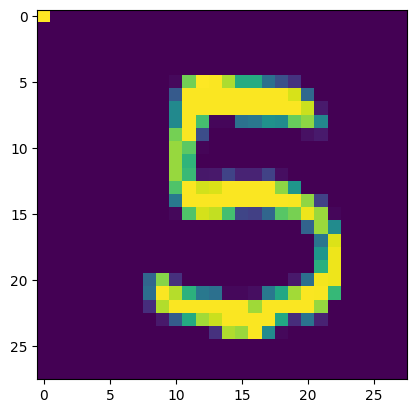

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.11662858 -0.04963092  0.13015399  0.38074887 -0.04380411  0.37186437
 -0.07374609 -0.19832817  0.14552358  0.2044153 ] 

Image no. 195


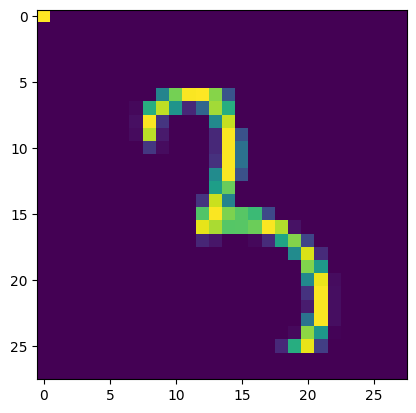

Real: 3
Predicted: 9
Rank of the correct answer: 3
Probabilities: [-0.11095008  0.00621939  0.0706906   0.13737387  0.06710137  0.22462522
  0.08903725  0.09355541  0.11996996  0.23345798] 



: 

In [28]:
def find_pos(item, lst): 
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z] 
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(Xt,W)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")